In [2]:
!pip install tensorflow tensorflow-cpu opencv-python matplotlib

In [3]:
!pip list


Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bi

In [ ]:
import tensorflow as tf


In [5]:
cpus = tf.config.experimental.list_physical_devices('CPU')

In [6]:
cpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [7]:
cpus = tf.config.experimental.list_physical_devices('CPU')
for cpu in cpus: 
    tf.config.experimental.set_memory_growth(cpu, True)

ValueError: Cannot set memory growth on non-GPU and non-Pluggable devices

Removing dodgy images

In [77]:
import cv2
import imghdr #checks the file extension



In [57]:
!rm -r data/sad/.ipynb_checkpoints


rm: cannot remove `data/sad/.ipynb_checkpoints': No such file or directory


In [139]:
import os
from matplotlib import pyplot as plt

In [6]:
data_dir = r"C:\Users\nithy\data"


In [7]:
for image_class in os.listdir(data_dir):
    for images in os.listdir( os.path.join(data_dir,image_class) ):
        print(images)
    

05-12-21-happy-people.jpg
07-120104-happy_people_are_not_nice_people.jpg
1-2.jpg
1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
11-Habits-of-Truly-Happy-People.jpg
154006829.jpg
170404-happy-workers-feature.jpg
1902539.jpg
1902540.jpg
1902587.jpg
1920px-face-smile.svg_.png.jpg
1HEoLBLidT2u4mhJ0oiDgig.png
227-2271622_happy-people-business-team-celebrating-png.png
7-Habits-of-Happy-People-image.jpeg
7-principles-of-successful-and-happy-people.png
7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg
8cxKy5g9i.jpg
960x0.jpg
A_Sep20_14_1189155141.jpg
bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg
blog_image_20180219221810890.jpg
brady-bunch-3.jpg
e162ccda8ce0f197f8863f327add9233.jpg
fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg
friends-happy-190821-800x450.jpg
GettyImages-565706549-949x534.jpg
GettyImages-871518740-1024x707.jpg
getty_152414899_97046097045006_68075.jpg
getty_478389113_970647970450091_99776.jpg
getty_494581822_130796.jpg
ge

In [8]:
img=cv2.imread(r"C:\Users\nithy\data\happy\154006829.jpg")


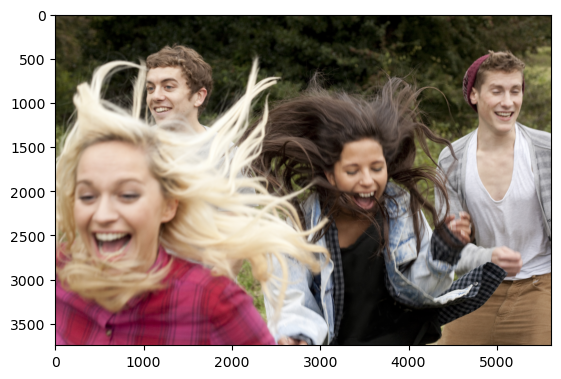

In [82]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()
#open cv reads image as BGR and matplotlib reads as RGB

In [9]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image C:\Users\nithy\data\happy\05-12-21-happy-people.jpg
Issue with image C:\Users\nithy\data\happy\07-120104-happy_people_are_not_nice_people.jpg
Issue with image C:\Users\nithy\data\happy\1-2.jpg
Issue with image C:\Users\nithy\data\happy\1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
Issue with image C:\Users\nithy\data\happy\11-Habits-of-Truly-Happy-People.jpg
Issue with image C:\Users\nithy\data\happy\154006829.jpg
Issue with image C:\Users\nithy\data\happy\170404-happy-workers-feature.jpg
Issue with image C:\Users\nithy\data\happy\1902539.jpg
Issue with image C:\Users\nithy\data\happy\1902540.jpg
Issue with image C:\Users\nithy\data\happy\1902587.jpg
Issue with image C:\Users\nithy\data\happy\1920px-face-smile.svg_.png.jpg
Issue with image C:\Users\nithy\data\happy\1HEoLBLidT2u4mhJ0oiDgig.png
Issue with image C:\Users\nithy\data\happy\227-2271622_happy-people-business-team-celebrating-png.png
Issue with image C:\Users\nithy\data\happy\7-Habits-of-Happy-People-im

Load the data


In [10]:
import numpy as np


In [24]:
data=tf.keras.utils.image_dataset_from_directory(data_dir,batch_size=8,image_size=(256,256))

Found 164 files belonging to 2 classes.


In [25]:
  data_iterator=data.as_numpy_iterator()

In [35]:
batch=data_iterator.next()

In [15]:
len(batch) # 2 parts to the batches. 
#1st is the img and next is labels. 
#Fitst is img loaded to memory as a numpy array.  

2

In [27]:
batch[0].shape


(8, 256, 256, 3)

In [37]:
batch[1] 
#sad=1
#happy=0

array([1, 0, 1, 0, 0, 0, 0, 0])

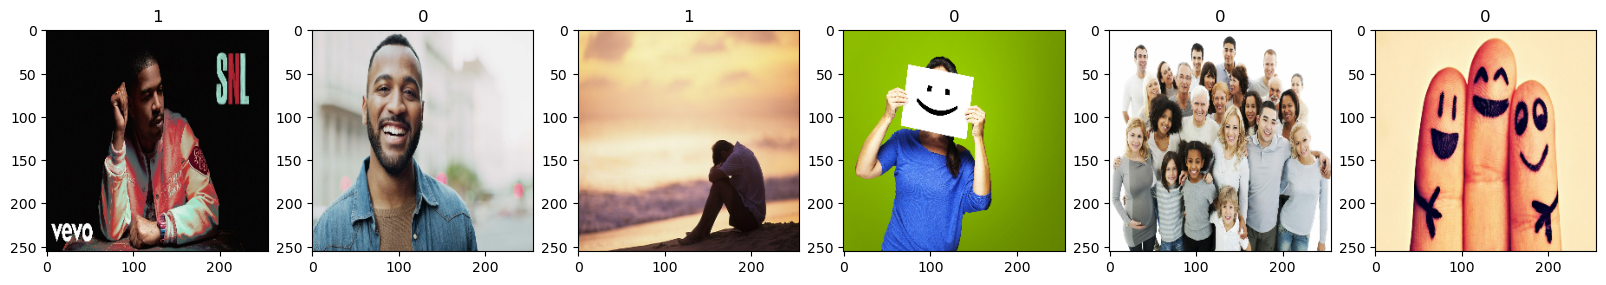

In [38]:
fig, ax = plt.subplots(ncols=6, figsize=(20,20))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Preprocessing data

In [39]:
data=data.map(lambda x,y:(x/255,y)) #x=img and y=label

In [40]:
scaled_iterator=data.as_numpy_iterator()


In [48]:
b=scaled_iterator.next()

In [50]:
b[0].max()

1.0

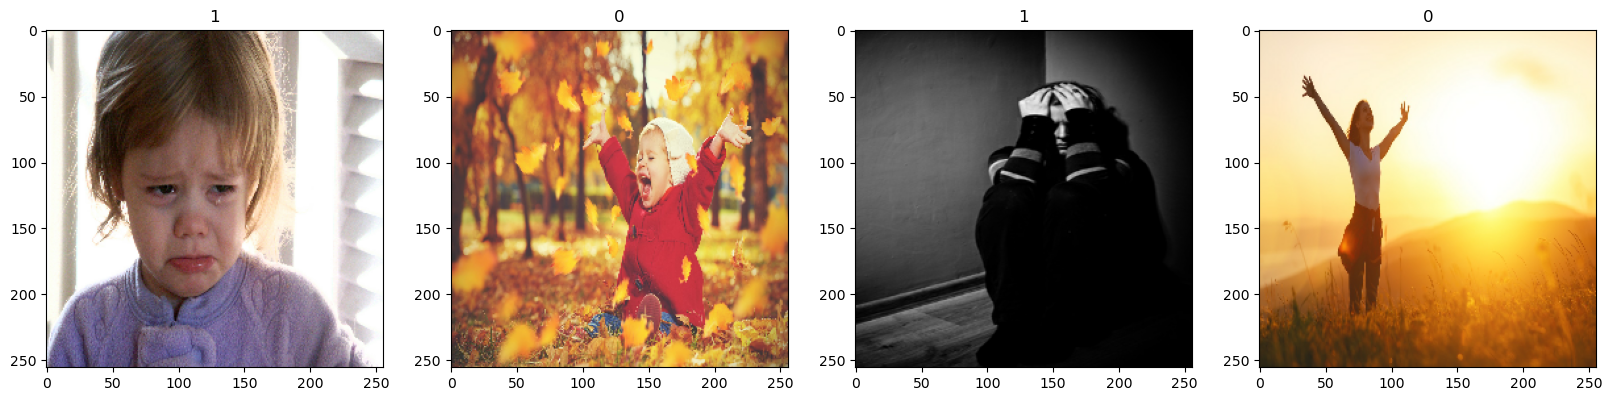

In [53]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(b[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(b[1][idx])

split data

In [54]:
len(data)

21

In [62]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)


In [63]:
train_size+val_size+test_size

21

In [64]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [67]:
len(test)

2

Deep Model

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [70]:
model=Sequential()

In [71]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [73]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [72]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

Train datab

In [74]:
logdir='logs'


In [75]:

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [76]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
14/14 [==============================] - 22s 1s/step - loss: 0.6853 - accuracy: 0.6518 - val_loss: 0.6650 - val_accuracy: 0.7250
Epoch 2/20
14/14 [==============================] - 18s 899ms/step - loss: 0.5761 - accuracy: 0.7143 - val_loss: 0.5956 - val_accuracy: 0.7500
Epoch 3/20
14/14 [==============================] - 17s 871ms/step - loss: 0.5355 - accuracy: 0.7054 - val_loss: 0.4084 - val_accuracy: 0.8000
Epoch 4/20
14/14 [==============================] - 16s 794ms/step - loss: 0.3815 - accuracy: 0.8393 - val_loss: 0.3132 - val_accuracy: 0.8500
Epoch 5/20
14/14 [==============================] - 17s 907ms/step - loss: 0.3351 - accuracy: 0.8482 - val_loss: 0.2279 - val_accuracy: 0.9500
Epoch 6/20
14/14 [==============================] - 18s 801ms/step - loss: 0.2503 - accuracy: 0.9196 - val_loss: 0.3652 - val_accuracy: 0.8750
Epoch 7/20
14/14 [==============================] - 17s 808ms/step - loss: 0.1827 - accuracy: 0.9554 - val_loss: 0.1886 - val_accuracy: 0.9250
Ep

Plot performance

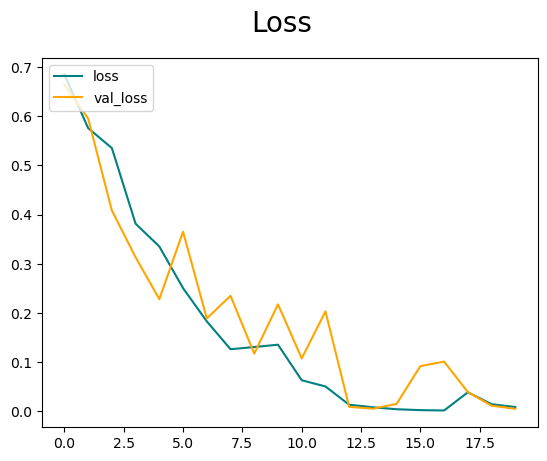

In [78]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


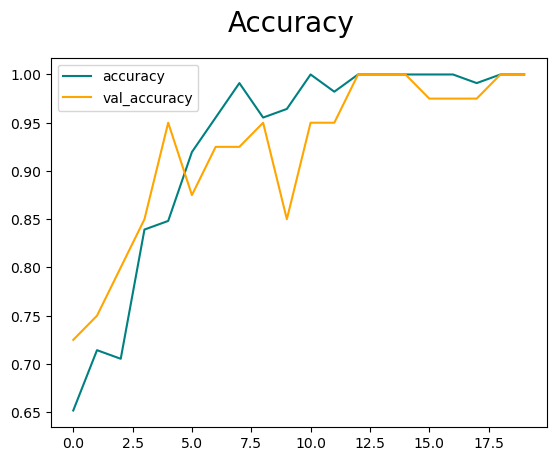

In [79]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


Evaluate

In [80]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [81]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [82]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


1/1 [==============================] - 3s 3s/step


In [85]:
print(f'Precision: {pre.result().numpy()}, Recall:{ re.result().numpy()}, Acuracy: {acc.result().numpy()}')

Precision: 1.0, Recall:1.0, Acuracy: 1.0


Test

In [177]:
import cv2
import matplotlib.pyplot as plt 

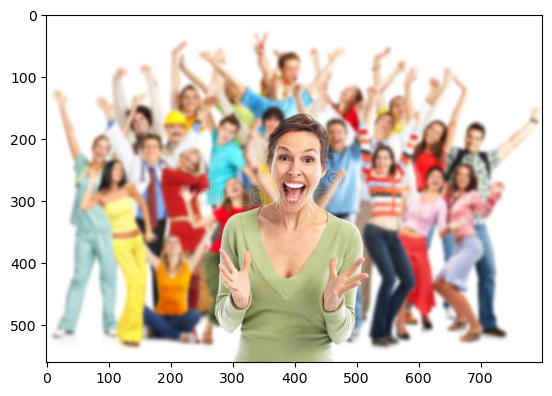

In [280]:
img=cv2.imread(r'C:\Users\nithy\Image classification\test\happy5.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

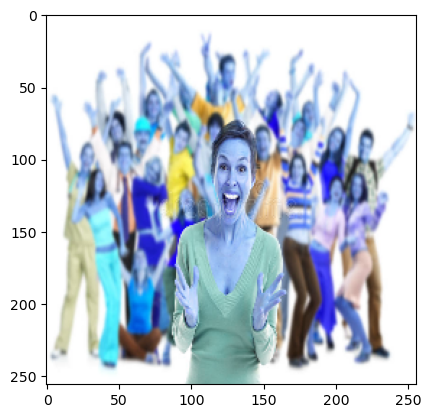

In [281]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()


In [282]:
resize.shape
s=np.expand_dims(resize,0)
s.shape

(1, 256, 256, 3)

In [283]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 34ms/step


In [284]:
yhat

array([[0.07330438]], dtype=float32)

In [285]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [272]:
from tensorflow.keras.models import load_model

In [273]:
model.save(os.path.join('models','happysadmodel.h5'))

In [274]:
new_model=load_model(os.path.join('models','happysadmodel.h5'))